<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

First 5 lines of dataset are listed below. At first glance it dosn't look like set contain categorical variables.

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Now let's check the datafor duplicates.

In [14]:
boston_df.loc[boston_df.duplicated()==True]

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV


This set doesn't contain duplicated rows. Now I can do some dscriptive statistics.

# Task 2: Generate Descriptive Statistics and Visualizations

In [10]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


As we can see, this set contains 506 rows and 13 columns of numerical values.

## 1. For the "Median value of owner-occupied homes" provide a boxplot

<AxesSubplot:ylabel='MEDV'>

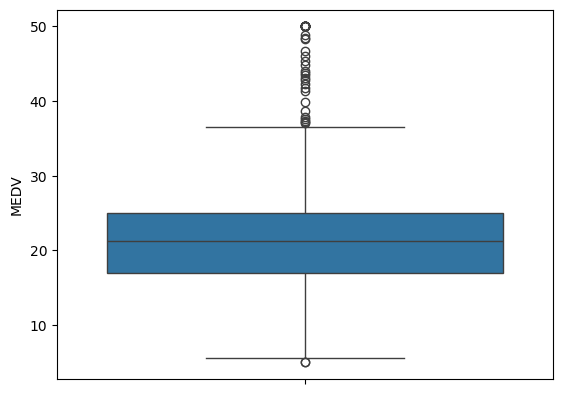

In [18]:
sns.boxplot(y='MEDV', data=boston_df)

### Findings:

On the MEDV box plot I see that data is compacted around median value of ~$22.5k, more or less symmetricaly, with one outlier below lower and several outliers above upper plot boundaries.

## 2. Provide a  bar plot for the Charles river variable

[Text(0, 0, '471'), Text(0, 0, '35')]

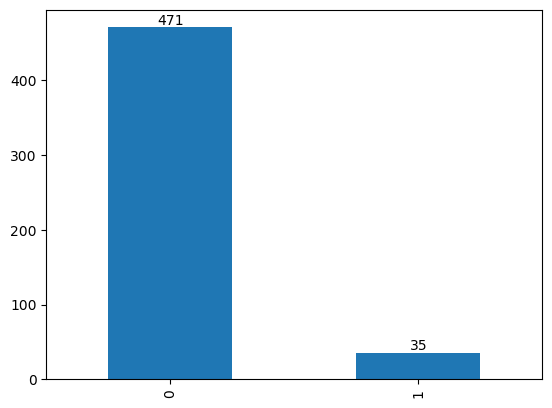

In [60]:
ax =boston_df.groupby('CHAS').count().reset_index().plot(kind='bar', y='Unnamed: 0', legend=False)
ax.bar_label(ax.containers[0])

### Findings:

As we can see, only 35 of 506 (~7%) hoseholds are located near the river bank.

## 3. Provide a boxplot for the MEDV variable vs the AGE variable.

* Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

In [57]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

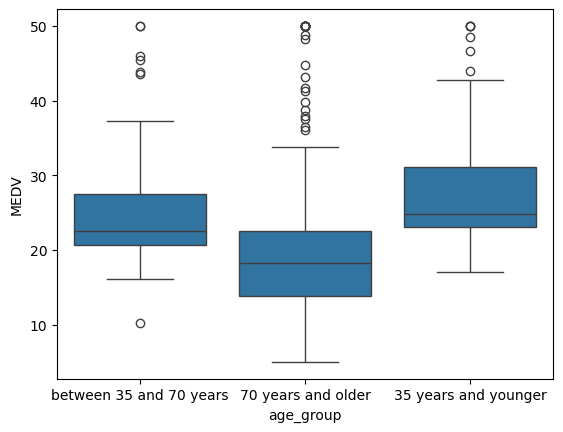

In [58]:
sns.boxplot(y='MEDV', x='age_group', data=boston_df)

### Findings:

We can see, that between 3 age groups, median values of homes have negative correlation with the age of owner, e.g. the more gae owner is, the less is the value of a house.

## 4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

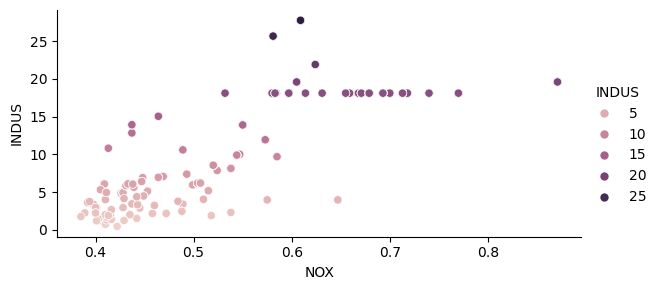

In [65]:
sns.relplot(y="INDUS", x="NOX", hue='INDUS', data=boston_df, height = 3, aspect = 2)

### Findings:

This scatter plot shows high positive correlation between proportion of indistrial clusters in a town and its nitrogenic pollution.

## 5. Create a histogram for the pupil to teacher ratio variable.

[Text(0, 0, '15'),
 Text(0, 0, '2'),
 Text(0, 0, '58'),
 Text(0, 0, '15'),
 Text(0, 0, '35'),
 Text(0, 0, '69'),
 Text(0, 0, '76'),
 Text(0, 0, '40'),
 Text(0, 0, '178'),
 Text(0, 0, '18')]

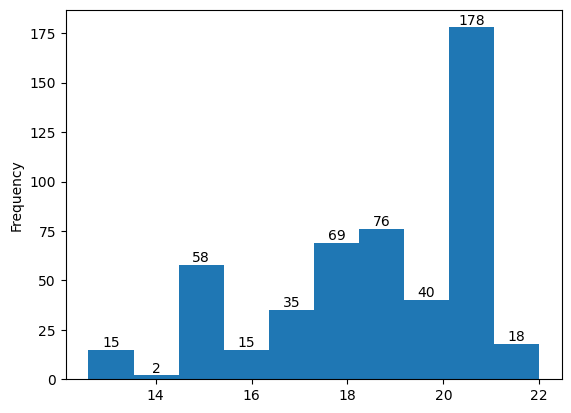

In [76]:
ax = boston_df.plot(kind='hist', y='PTRATIO', legend=False)
ax.bar_label(ax.containers[0])

### Findings:

The distribution of pupils to teachers slightly differs from town to town, with obvious positive skewness to higher values.

* As a bonus, I want to see a heatmap of correlated variables in the dataset.

<ipython-input-93-888215bd3f61>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(boston_df.corr(),annot=True,cmap='RdYlGn')


<AxesSubplot:>

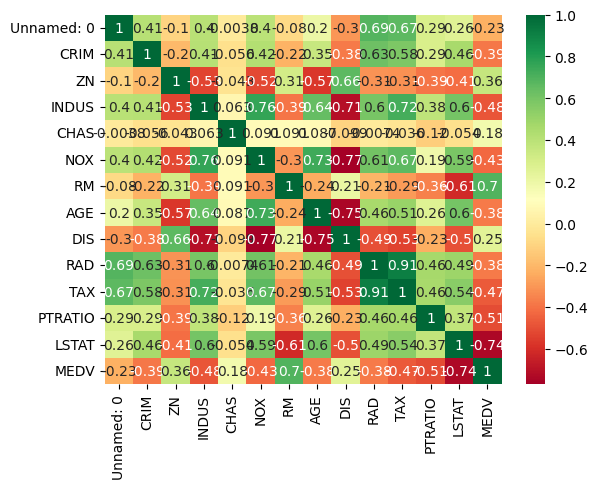

In [93]:
sns.heatmap(boston_df.corr(),annot=True,cmap='RdYlGn')

# Task 3: Use the appropriate tests to answer the questions provided.

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not?

Hypoteses to test with t-statistics:

*   $H\_0:$ µ1 = µ2 (there is no difference between houses value near river bank and other houses)
*   $H\_1:$ Houses value depends of proximity to the river


In [80]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'])

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Since p-value is less then α = 0.05, the null hypothesis should be rejected. There is enough proof of a statistical difference betwee house value and proximity to the river!

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

Hypoteses to test with ANOVA:

*   $H\_0:$ µ1 = µ2 = µ3 (there are no difference between older and newer houses value)
*   $H\_1:$ At least one group of houses value depends of their built time

In [89]:
scipy.stats.levene(
    boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
    boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
    boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
    center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

Since p-value is greater then α = 0.05, the null hypotheses cannot be rejected. There is no significant statistical evidence that houses value depend of their age.

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypoteses to test with Pearson Correlation:

*   $H\_0:$ There is no relationship between NO$_{2}$ concentrations and business acres proportion in a town.
*   $H\_1:$ Said relationship exists.

In [94]:
X = boston_df['NOX']
y = boston_df['INDUS']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  INDUS   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           7.91e-98
Time:                        13:54:21   Log-Likelihood:                -1470.5
No. Observations:                 506   AIC:                             2945.
Df Residuals:                     504   BIC:                             2954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.9414      0.965    -14.450      0.000     -15.837     -12.046
NOX           45.2108      1.703     26.554      0.000      41.866      48.556
==============================================================================
Omnibus:                       46.050   Durbin-Watson:                   0.272
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.622
Skew:                           0.649   Prob(JB):                     2.07e-15
Kurtosis:                       4.233   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As p-value of regression is close zero whe can reject null hypotesis. Determination coeffitient R$^{2}$=0.583 and NOX coeff=45.2108 show high positive correlation (C=0.76) between industrial acres in a town and NO$_{2}$ pollution. The correlation value in the regression is exact as in the heatmap above.

### 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

Hypoteses to test with Regression analysis:

*   $H\_0:$ There is no relationship between DIS and MEDV values.
*   $H\_1:$ MEDV is definetely depending on DIS.

In [95]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        14:05:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see, in this case p-value also is close to zero. That means that the hypotheses of no relationship between price and distance is not valid and to be rejected. 

But low correlation √0.062=0.24 is an indication of that distance alone is not a good predictor for a house value. Though it might be a descent independent variable of more complex multiple regression model.